In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Queueing simulation
## Exponential random draws

In [2]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with given rate.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [3]:
######
#ADD YOUR CODE HERE.
######
class Event:
    def __init__(self,time):
        self.time=time
        
class Generation(Event):
    def __init__(self,time):
        super().__init__(time)
    
class Arrival(Event):
    def __init__(self,time):
        super().__init__(time)
    
class Departure(Event):
    def __init__(self,time):
        super().__init__(time)
        
class Termination(Event):
    def __init__(self,time):
        super().__init__(time)

## Define scenario

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [5]:
def simulate(scenario):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    
    ######
    #ADD YOUR CODE HERE.
    ######
    
    queue=0
    times=[0]
    queues=[0]
    
    generation=Generation(exponential_rng(scenario.lam))
    termination=Termination(scenario.demand_duration)
    events=[generation,termination]
    
    while len(events):
        e=events[0]
        
        if isinstance(e,Generation):
            arrival=Arrival(e.time+scenario.t0*np.random.rand())
            events.append(arrival)    
            next_generation_time=e.time+exponential_rng(scenario.lam)
            
            if next_generation_time<scenario.demand_duration:
                generation=Generation(next_generation_time)
                events.append(generation)
        
        elif isinstance(e,Arrival):
            times.append(e.time)
            queue+=1
            queues.append(queue)
            
            if queue==1:
                departure=Departure(e.time+exponential_rng(scenario.mu))
                events.append(departure)
        
        elif isinstance(e,Departure):
            times.append(e.time)
            queue-=1
            queues.append(queue)
            
            if queue:
                departure=Departure(e.time+exponential_rng(scenario.mu))
                events.append(departure)
                
        elif isinstance(e,Termination):
            print(f'End of generation')
        
        events.pop(0)
        events.sort(key=lambda event:event.time)
        
    return times, queues

## Run simulation

In [6]:
#%timeit
times, queues = simulate(Scenario())

End of generation


## Repeat the simulation multiple times

In [7]:
D = 3
times_queues = [simulate(Scenario()) for d in range(D)]

End of generation
End of generation
End of generation


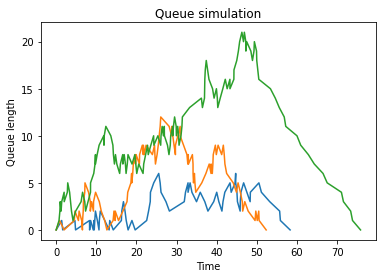

In [8]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

for t, q in times_queues:
    ax.plot(t, q)
ax.set(title='Queue simulation',
       xlabel='Time',
       ylabel='Queue length')
fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.show()